In [19]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import json
import tifffile as tiff

In [47]:
mask = tiff.imread('/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/datasets/IMMUcan/masks/IMMUcan_Batch20191023_S-190805-00002_002.tiff')

In [24]:
def check_contiguous_labels(mask_path):
    # Load the segmentation mask
    seg_mask = tiff.imread(mask_path)  # Assumes TIFF; adjust if using NPZ or other formats
    unique_labels = np.unique(seg_mask)
    unique_labels = unique_labels[unique_labels > 0]  # Exclude background (0)
    
    if len(unique_labels) == 0:
        return False, []  # No cells
    
    # Check if labels are contiguous from 1 to max
    max_label = unique_labels.max()
    expected_labels = np.arange(1, max_label + 1)
    is_contiguous = np.array_equal(np.sort(unique_labels), expected_labels)
    
    return is_contiguous, unique_labels

In [48]:
mask.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [28]:
mask

array([[   0,    0,    0, ...,    9,    9,    0],
       [   0,    0,    0, ...,    9,    9,    0],
       [   0,    0,   43, ...,    9,    9,    0],
       ...,
       [1863, 1863, 1863, ...,    0,    0,    0],
       [1863, 1863, 1863, ...,    0,    0,    0],
       [1863, 1863, 1863, ...,    0,    0,    0]], dtype=uint16)

In [42]:
is_contig, labels = check_contiguous_labels('/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/datasets/IMMUcan/masks/IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03_004.tiff')
print(f"Is contiguous: {is_contig}")
print(f"Unique labels: {labels}")
print(f"Number of cells: {len(labels)}")
print(f"Max label: {labels.max() if len(labels) > 0 else 'N/A'}")

Is contiguous: True
Unique labels: [   1    2    3 ... 3642 3643 3644]
Number of cells: 3644
Max label: 3644


In [ ]:
print(f"Is contiguous: {is_contig}")
print(f"Unique labels: {labels}")
print(f"Number of cells: {len(labels)}")
print(f"Max label: {labels.max() if len(labels) > 0 else 'N/A'}")

In [30]:
val = pd.read_csv("/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/cellsighter/IMMUcan/test_results_fold_0.csv")
df = pd.read_csv("/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/datasets/IMMUcan_quantification.csv")

In [67]:
print(df)

             MPO  HistoneH3       SMA      CD16      CD38     HLADR      CD27  \
0       0.000000   1.819988  0.502650  1.265410  0.515007  3.331261  0.403800   
1       0.196983   2.541684  1.247892  0.161012  1.071582  0.414533  0.735485   
2       0.135920   2.393087  1.136961  0.505529  0.605836  0.710857  0.419814   
3       0.210604   2.301097  0.858570  0.422594  0.731755  1.433206  0.373062   
4       0.165905   2.244917  1.396334  1.744382  0.458541  4.006500  0.003607   
...          ...        ...       ...       ...       ...       ...       ...   
457112  0.342312   5.248389  3.919117  2.144037  1.008428  1.917531  1.592820   
457113  0.110884   3.520289  0.310834  2.590231  2.336469  3.652604  1.443007   
457114  0.150941   4.214958  2.651646  0.807826  0.403674  1.226701  0.400776   
457115  0.203716   6.014126  2.757555  2.679402  1.482629  2.401113  1.907091   
457116  0.490591   5.822348  1.615410  2.266402  1.272588  1.986723  2.076126   

            CD15    CD45RA 

In [46]:
df['cell_id'].min()

1

In [65]:
val[val['image_id'] =='IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03_004']

,Unnamed: 0,pred,pred_prob,label,cell_id,image_id,prob_list,predicted_phenotype
0,0,1,0.885264,2,178,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.006423568353056908, 0.8852642178535461, 0.0...",CD4+_T_cell
1,1,1,0.344146,12,189,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.07360406965017319, 0.3441455364227295, 0.34...",Treg
2,2,2,0.389348,3,193,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.18689057230949402, 0.17617526650428772, 0.3...",CD8+_T_cell
3,3,13,0.485770,1,194,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.03997499495744705, 0.23141250014305115, 0.0...",BnT
4,4,1,0.345746,8,195,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.2125581055879593, 0.34574562311172485, 0.09...",Neutrophil
...,...,...,...,...,...,...,...,...
3052,3052,9,0.206412,6,3462,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.18172113597393036, 0.13878124952316284, 0.0...",M2_Macrophage
3053,3053,1,0.322934,13,3463,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.2886584997177124, 0.3229341208934784, 0.028...",undefined
3054,3054,2,0.328403,12,3466,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.004262538626790047, 0.04205607995390892, 0....",Treg
3055,3055,0,0.360815,6,3467,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.36081549525260925, 0.10419492423534393, 0.0...",M2_Macrophage


In [66]:
print(val[val['image_id'] =='IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR-TIS-01-IMC-01_002'])

       Unnamed: 0  pred  pred_prob  label  cell_id  \
76996       76996    11   0.356916      4       64   
76997       76997     3   0.420834      4       65   
76998       76998     7   0.555716      8       66   
76999       76999    13   0.613147     11       68   
77000       77000    13   0.390795      4       69   
...           ...   ...        ...    ...      ...   
78244       78244    13   0.726025      4     1462   
78245       78245    13   0.853395      4     1463   
78246       78246    13   0.891370      4     1464   
78247       78247    13   0.428378      4     1465   
78248       78248    13   0.633558      6     1466   

                                                image_id  \
76996  IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...   
76997  IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...   
76998  IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...   
76999  IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...   
77000  IMMUcan_WFLOW_Batch20210304_10067564-SPECT-V

In [54]:
val[val['image_id'] =='IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR-TIS-01-IMC-01_002']

,Unnamed: 0,pred,pred_prob,label,cell_id,image_id,prob_list,predicted_phenotype
76996,76996,11,0.356916,4,64,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,"[0.014988904818892479, 0.002143549034371972, 0...",Cancer
76997,76997,3,0.420834,4,65,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,"[0.0012957882136106491, 0.002356691984459758, ...",Cancer
76998,76998,7,0.555716,8,66,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,"[0.02458120882511139, 0.006329241208732128, 0....",Neutrophil
76999,76999,13,0.613147,11,68,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,"[0.0029422880616039038, 0.0010688903275877237,...",Stroma
77000,77000,13,0.390795,4,69,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,"[0.041780609637498856, 0.015601785853505135, 0...",Cancer
...,...,...,...,...,...,...,...,...
78244,78244,13,0.726025,4,1462,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,"[0.019341057166457176, 0.018947279080748558, 0...",Cancer
78245,78245,13,0.853395,4,1463,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,"[0.02586464025080204, 0.014387899078428745, 0....",Cancer
78246,78246,13,0.891370,4,1464,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,"[0.01647784374654293, 0.04441659152507782, 0.0...",Cancer
78247,78247,13,0.428378,4,1465,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,"[0.0009963089833036065, 0.033678606152534485, ...",Cancer


In [57]:
df[df['sample_id'] == 'IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR-TIS-01-IMC-01_002']['cell_id']

108812       1
108813       2
108814       3
108815       4
108816       5
          ... 
110352    1552
110353    1553
110354    1555
110355    1556
110356    1557
Name: cell_id, Length: 1545, dtype: int64

In [53]:
merged[merged['image_id'] == 'IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR-TIS-01-IMC-01_002']

,image_id,cell_id,predicted_phenotype,MPO,HistoneH3,SMA,CD16,CD38,HLADR,CD27,...,area,major_axis_length,minor_axis_length,eccentricity,width_px,height_px,cell_labels,level_1_cell_type,level_2_cell_type,cell_type
76996,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,64,Cancer,1.877408,2.879476,0.546885,0.098964,0.190487,1.707816,0.080267,...,41.0,7.502731,7.045990,0.343580,600.0,600.0,Neutrophil,Immune,Myeloid_immune,Neutrophil
76997,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,65,Cancer,0.539561,2.909039,0.780572,0.350398,0.185677,1.875343,0.368605,...,130.0,16.941829,10.040262,0.805474,600.0,600.0,Cancer,Cancer,Cancer,Cancer
76998,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,66,Neutrophil,0.184666,2.466904,0.225734,0.205313,0.102008,0.335337,0.126526,...,122.0,13.355663,11.738110,0.477031,600.0,600.0,unlabelled,Cancer,Cancer,Cancer
76999,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,68,Stroma,0.168807,3.068878,0.506162,0.251857,0.080583,1.805949,0.185232,...,156.0,15.694778,12.962421,0.563807,600.0,600.0,Cancer,Cancer,Cancer,Cancer
77000,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,69,Cancer,0.211193,2.115365,1.302490,0.076722,0.158847,0.846822,0.087172,...,95.0,14.069891,8.655387,0.788394,600.0,600.0,Stroma,Stromal,Stroma,Stroma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78244,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,1462,Cancer,0.202529,2.107676,0.605200,0.045081,0.106386,0.817093,0.282276,...,128.0,14.284118,11.526087,0.590666,600.0,600.0,Cancer,Cancer,Cancer,Cancer
78245,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,1463,Cancer,0.141588,2.346132,0.334822,0.190314,0.059407,0.974441,0.206309,...,152.0,14.608613,13.257744,0.419989,600.0,600.0,Cancer,Cancer,Cancer,Cancer
78246,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,1464,Cancer,0.149904,2.860575,0.365475,0.194526,0.113255,0.223070,0.259495,...,160.0,15.841237,12.866971,0.583316,600.0,600.0,Cancer,Cancer,Cancer,Cancer
78247,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,1465,Cancer,0.175567,2.520969,0.518508,0.044103,0.093023,0.470171,0.117325,...,68.0,11.455156,7.585555,0.749331,600.0,600.0,unlabelled,Cancer,Cancer,Cancer


<Axes: ylabel='Frequency'>

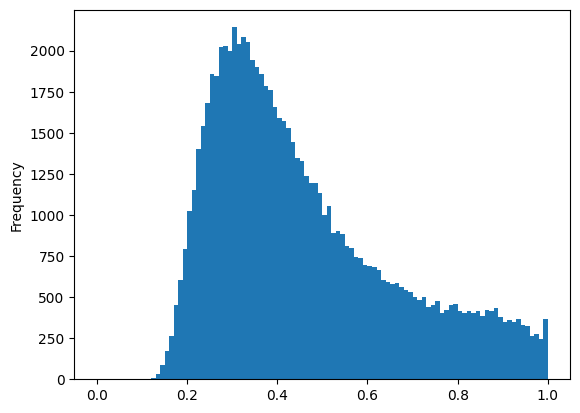

In [31]:
val['pred_prob'].plot.hist(bins=100, range=(0, 1))

In [32]:
with open("/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/cellsighter/results_IMMUcan/label_mapping.json") as f:
    mapping = json.load(f)

In [33]:
inv_mapping = {v: k for k, v in mapping.items()}

In [34]:
val['predicted_phenotype'] = val['label'].map(inv_mapping)

In [ ]:
mapping

In [43]:
print(val)

       Unnamed: 0  pred  pred_prob  label  cell_id  \
0               0     1   0.885264      2      178   
1               1     1   0.344146     12      189   
2               2     2   0.389348      3      193   
3               3    13   0.485770      1      194   
4               4     1   0.345746      8      195   
...           ...   ...        ...    ...      ...   
78244       78244    13   0.726025      4     1462   
78245       78245    13   0.853395      4     1463   
78246       78246    13   0.891370      4     1464   
78247       78247    13   0.428378      4     1465   
78248       78248    13   0.633558      6     1466   

                                                image_id  \
0      IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...   
1      IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...   
2      IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...   
3      IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...   
4      IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-

In [11]:
val['label'].value_counts()

label
 4     36232
 11     7884
 3      6988
 2      4630
 1      4221
 6      4161
 13     2989
 0      2741
 9      2128
 12     1855
 5      1568
 8      1513
 10      481
-1       464
 7       394
Name: count, dtype: int64

In [12]:
val['predicted_phenotype'].value_counts()

predicted_phenotype
Cancer                         36232
Stroma                          7884
CD8+_T_cell                     6988
CD4+_T_cell                     4630
BnT                             4221
M2_Macrophage                   4161
undefined                       2989
B_cell                          2741
Plasma_cell                     2128
Treg                            1855
Dendritic_cell                  1568
Neutrophil                      1513
Plasmacytoid_dendritic_cell      481
NK_cell                          394
Name: count, dtype: int64

In [ ]:
print(val)

In [35]:
merged = pd.merge(
    val[['image_id', 'cell_id', 'predicted_phenotype']],
    df,
    how='left',
    left_on=['image_id', 'cell_id'],
    right_on=['sample_id', 'cell_id']
)

In [12]:
merged

,image_id,cell_id,predicted_phenotype,MPO,HistoneH3,SMA,CD16,CD38,HLADR,CD27,...,area,major_axis_length,minor_axis_length,eccentricity,width_px,height_px,cell_labels,level_1_cell_type,level_2_cell_type,cell_type
0,IMMUcan_Batch20201113_10041962-BREAS-VAR-TIS-0...,63,CD8+_T_cell,0.179870,3.602909,0.568037,1.184181,0.197140,3.774852,0.254291,...,25.0,5.982403,5.301741,0.463259,600.0,600.0,Dendritic_cell,Immune,Myeloid_immune,Dendritic_cell
1,IMMUcan_Batch20201113_10041962-BREAS-VAR-TIS-0...,64,Cancer,0.157702,3.806706,0.006399,1.166062,0.044486,3.382240,1.249950,...,80.0,11.132521,9.344756,0.543498,600.0,600.0,CD8+_T_cell,Immune,Lymphoid_immune,CD8+_T_cell
2,IMMUcan_Batch20201113_10041962-BREAS-VAR-TIS-0...,66,Cancer,0.386933,2.951591,0.000000,0.384523,0.187054,1.168471,0.889613,...,66.0,10.633703,7.997051,0.659109,600.0,600.0,Cancer,Cancer,Cancer,Cancer
3,IMMUcan_Batch20201113_10041962-BREAS-VAR-TIS-0...,67,CD8+_T_cell,0.283851,3.443220,0.118360,0.319759,0.486126,0.754443,0.795188,...,344.0,24.999831,17.814976,0.701567,600.0,600.0,Cancer,Cancer,Cancer,Cancer
4,IMMUcan_Batch20201113_10041962-BREAS-VAR-TIS-0...,68,Cancer,0.161244,3.780911,0.075822,0.479773,0.086242,3.423630,0.671005,...,69.0,10.883783,8.057704,0.672232,600.0,600.0,CD8+_T_cell,Immune,Lymphoid_immune,CD8+_T_cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249258,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,2581,Cancer,0.127145,2.709247,1.210277,0.321992,0.397430,0.614171,0.133405,...,180.0,17.185496,13.541887,0.615696,600.0,600.0,unlabelled,Cancer,Cancer,Cancer
249259,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,2582,Cancer,0.134063,2.715287,1.192161,0.562202,0.348480,1.111251,0.200353,...,135.0,13.736894,12.534851,0.409087,600.0,600.0,unlabelled,Cancer,Cancer,Cancer
249260,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,2583,Stroma,0.139051,2.573796,1.048147,0.748153,0.449879,1.894841,0.248064,...,239.0,22.579585,13.789024,0.791873,600.0,600.0,unlabelled,Cancer,Cancer,Cancer
249261,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,2584,Stroma,0.105894,2.642378,1.371111,0.532614,0.355699,1.283252,0.178085,...,144.0,15.576242,12.026988,0.635456,600.0,600.0,unlabelled,Stromal,Stroma,Stroma


In [14]:
merged['predicted_phenotype'].value_counts(), merged['cell_type'].value_counts()

(predicted_phenotype
 Cancer                         36232
 Stroma                          7884
 CD8+_T_cell                     6988
 CD4+_T_cell                     4630
 BnT                             4221
 M2_Macrophage                   4161
 undefined                       2989
 B_cell                          2741
 Plasma_cell                     2128
 Treg                            1855
 Dendritic_cell                  1568
 Neutrophil                      1513
 Plasmacytoid_dendritic_cell      481
 NK_cell                          394
 Name: count, dtype: int64,
 cell_type
 Cancer                         36291
 Stroma                          7877
 CD8+_T_cell                     6980
 CD4+_T_cell                     4612
 BnT                             4334
 M2_Macrophage                   4121
 undefined                       2958
 B_cell                          2839
 Plasma_cell                     2104
 Treg                            1841
 Dendritic_cell             

In [41]:
merged[merged['cell_type'].isna()]['image_id'].iloc[0]

'IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03_004'

In [29]:
merged[merged['cell_type'] == 'nan']['image_id'].iloc[0]

'IMMUcan_Batch20201113_10041962-BREAS-VAR-TIS-01-IMC-01_002'

In [36]:
df[df['sample_id'] =='IMMUcan_Batch20201113_10041962-BREAS-VAR-TIS-01-IMC-01_002']['cell_id'].iloc[269]

272

In [ ]:
merged['predicted_phenotype'] = merged['predicted_phenotype'].fillna('undefined')

In [9]:
merged['cell_type'].isna().sum(), merged['predicted_phenotype'].isna().sum()

(1454, 1615)

In [15]:
# Ensure no NaN and all string types for classification_report
merged.dropna(inplace=True)
merged['cell_type'] = merged['cell_type'].astype(str)
merged['predicted_phenotype'] = merged['predicted_phenotype'].astype(str)

print(classification_report(merged['cell_type'], merged['predicted_phenotype'], zero_division=0))

                             precision    recall  f1-score   support

                     B_cell       0.26      0.25      0.25      2817
                        BnT       0.33      0.32      0.33      4321
                CD4+_T_cell       0.12      0.12      0.12      4576
                CD8+_T_cell       0.17      0.17      0.17      6929
                     Cancer       0.67      0.67      0.67     36137
             Dendritic_cell       0.07      0.07      0.07      1520
              M2_Macrophage       0.12      0.12      0.12      4087
                    NK_cell       0.02      0.02      0.02       380
                 Neutrophil       0.11      0.11      0.11      1463
                Plasma_cell       0.12      0.12      0.12      2087
Plasmacytoid_dendritic_cell       0.06      0.06      0.06       475
                     Stroma       0.22      0.22      0.22      7818
                       Treg       0.05      0.05      0.05      1826
                  undefined      

In [ ]:
merged[]

In [16]:
cm = confusion_matrix(merged['cell_type'], merged['predicted_phenotype'], normalize='true')


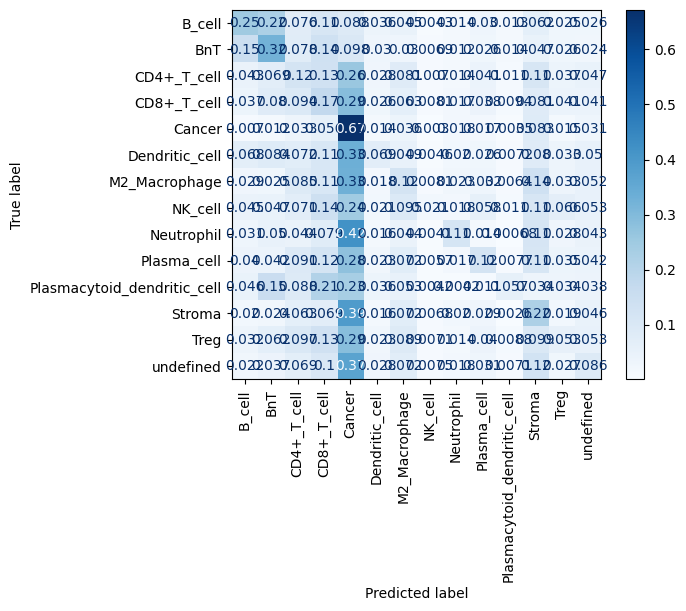

In [17]:
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(merged['cell_type'].unique()))
cmd.plot(cmap='Blues', xticks_rotation=90)

# Lets check the array creation works as intended

In [ ]:
labels = np.load('/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/cellsighter/IMMUcan/IMMUcan_Batch20220908_10087692-SPECT-VAR-TIS-01-IMC-01_004.npz')['data']

In [ ]:
len(labels)

In [ ]:
np.sum(labels == -1)

In [ ]:
df = pd.read_csv("/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/datasets/IMMUcan_quantification.csv")

In [ ]:
df = df[df['sample_id'] == 'IMMUcan_Batch20220908_10087692-SPECT-VAR-TIS-01-IMC-01_004']
df

In [ ]:
labels = labels[labels != -1]

In [ ]:
df['check'] = labels

In [ ]:
df['check'] = df['check'].map(inv_mapping)
df

In [ ]:
print(classification_report(df['check'], df['cell_type'], zero_division=0))